In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
print(torch.__version__)

2.2.2


In [3]:
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
weight = 0.7
bias = 0.3
#  y = m*x + c ---> m = weight ; c=bias
y = weight*X + bias

In [4]:
X

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800],
        [0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [5]:
y

tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260],
        [0.4400],
        [0.4540],
        [0.4680],
        [0.4820],
        [0.4960],
        [0.5100],
        [0.5240],
        [0.5380],
        [0.5520],
        [0.5660],
        [0.5800],
        [0.5940],
        [0.6080],
        [0.6220],
        [0.6360],
        [0.6500],
        [0.6640],
        [0.6780],
        [0.6920],
        [0.7060],
        [0.7200],
        [0.7340],
        [0.7480],
        [0.7620],
        [0.7760],
        [0.7900],
        [0.8040],
        [0.8180],
        [0.8320],
        [0.8460],
        [0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

In [6]:
train_set = int(0.8 * len(X))
X_train = X[:train_set]
y_train = y[:train_set]
X_test = X[train_set:]
y_test = y[train_set:]

In [7]:
def plot_predictions(
    train_data = X_train,
    train_labels = y_train,
    test_data = X_test,
    test_labels = y_test,
    predictions = None
):
    """
    Plt the predictions out of the data.
    """
    plt.figure(figsize=(10,7))

    # Plot training data in blue
    plt.scatter(train_data,train_labels,c="blue",s=4,label="Training Data")


    # Plot the testing data in red
    plt.scatter(test_data,test_labels,c="red",s=4,label="Testing Data")

    # Plot the predictions if they exists
    if predictions is not None:
        predictions = predictions.detach().numpy()
        plt.scatter(test_data,predictions,c="black", s=4, label="Predictions")
    plt.legend(prop={"size": 11})

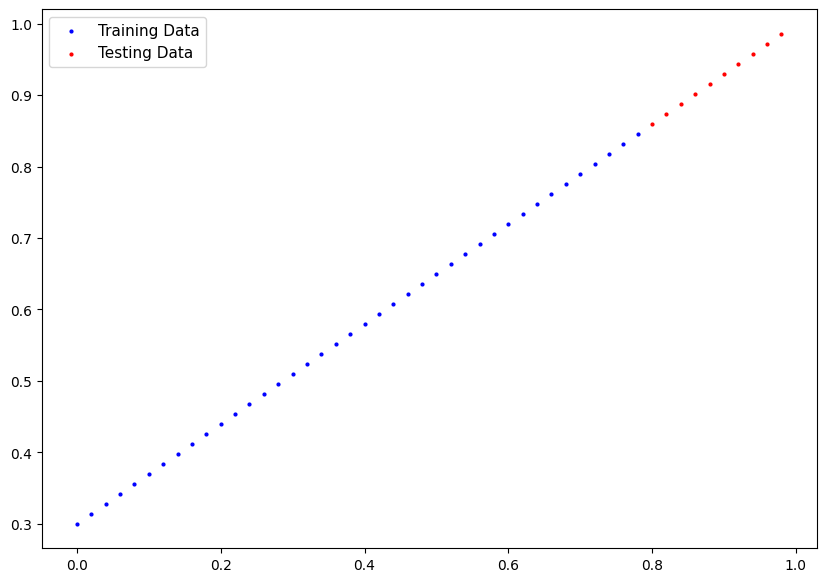

In [8]:
plot_predictions()

#### LinearRegresionModel

We'll do it manually by inheriting a ```nn.Module``` from the `torch` library and use it to implement linear regression into our own data

In [9]:
class LinearRegressionModel(nn.Module):

    def __init__(self):
        super().__init__()

        self.weights = nn.Parameter(torch.randn(1,dtype=torch.float,requires_grad=True))
        self.bias = nn.Parameter(torch.randn(1,dtype=torch.float,requires_grad=True))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return (self.weights * x) + self.bias

In [10]:
torch.manual_seed(42)
model = LinearRegressionModel()
list(model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [11]:
with torch.inference_mode():
    preds = model(X_test)

In [12]:
preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [13]:
y_test - preds

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

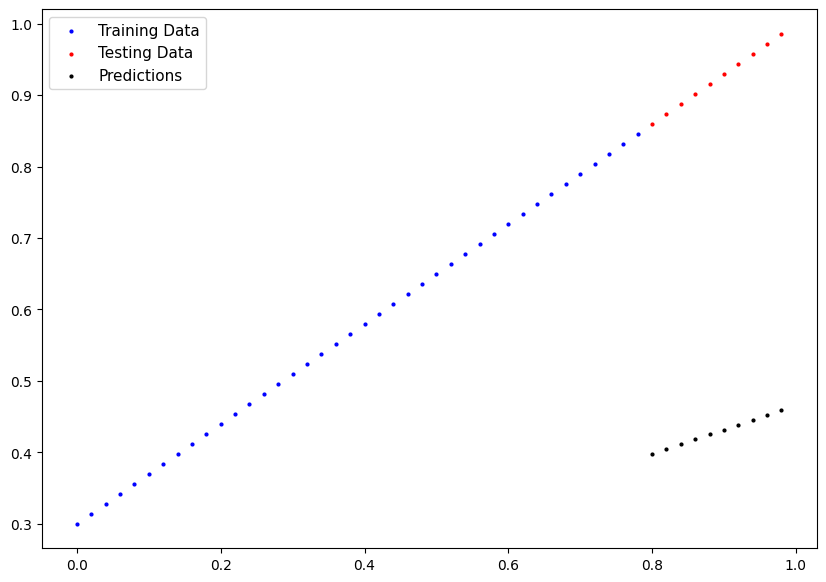

In [14]:
plot_predictions(predictions=preds)

In [15]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(),lr=0.01)

Building a training loop.


Things to do:
0. Loop through the data
1. Set the model in training mode
2. Forward pass (This means our data moving through the `forward()` function a.k.a forward propagation)
3. Make predictions on data and calculate the loss (compare predictions to ground truth), store it in ``loss``.
4. Optimizer zero grad ``optimizer.zero_grad()`` to clear the weights and biases from the memory.
5. Loss Backwards (backpropagate through the loss, to calcuate the gradients) ``loss.backward()``.
6. Optimiser step (Use the optimizer to travel back through the network and update the parameters) ``optimizer.step()``.

In [16]:
epochs = 300

for epoch in range(epochs):

    # Set the model in training mode
    model.train()

    # Forward pass the data and store the predictions in y_pred
    y_pred = model(X_train)

    # Calculate the loss
    loss = loss_fn(y_pred,y_train)


    # Put optimizer into zero_grad()
    optimizer.zero_grad()

    # Backpropagate the losses
    loss.backward()

    # Step the optimizer to calculate the gradients
    optimizer.step()

    # Put the model in eval mode
    model.eval()

    # Testing loop
    with torch.inference_mode():
        # Make forward pass on testing data
        test_preds = model(y_test)

        # Calculate test loss
        test_loss = loss_fn(test_preds,y_test)

    if epoch%10==0:
        print(f"Epoch: {epoch} | Training Loss: {loss} | Testing Loss: {test_loss}")

Epoch: 0 | Training Loss: 0.31288138031959534 | Testing Loss: 0.4698256850242615
Epoch: 10 | Training Loss: 0.1976713240146637 | Testing Loss: 0.33382871747016907
Epoch: 20 | Training Loss: 0.08908725529909134 | Testing Loss: 0.20348870754241943
Epoch: 30 | Training Loss: 0.053148526698350906 | Testing Loss: 0.12975125014781952
Epoch: 40 | Training Loss: 0.04543796554207802 | Testing Loss: 0.09794081002473831
Epoch: 50 | Training Loss: 0.04167863354086876 | Testing Loss: 0.08290375024080276
Epoch: 60 | Training Loss: 0.03818932920694351 | Testing Loss: 0.07198350876569748
Epoch: 70 | Training Loss: 0.03476089984178543 | Testing Loss: 0.06314468383789062
Epoch: 80 | Training Loss: 0.03132382780313492 | Testing Loss: 0.05430586263537407
Epoch: 90 | Training Loss: 0.02788739837706089 | Testing Loss: 0.046160854399204254
Epoch: 100 | Training Loss: 0.024458957836031914 | Testing Loss: 0.0373220220208168
Epoch: 110 | Training Loss: 0.021020207554101944 | Testing Loss: 0.028483206406235695
E

In [17]:
y_preds = model(X_test)

In [18]:
y_test - y_preds

tensor([[-0.0085],
        [-0.0085],
        [-0.0085],
        [-0.0085],
        [-0.0085],
        [-0.0084],
        [-0.0084],
        [-0.0084],
        [-0.0084],
        [-0.0084]], grad_fn=<SubBackward0>)

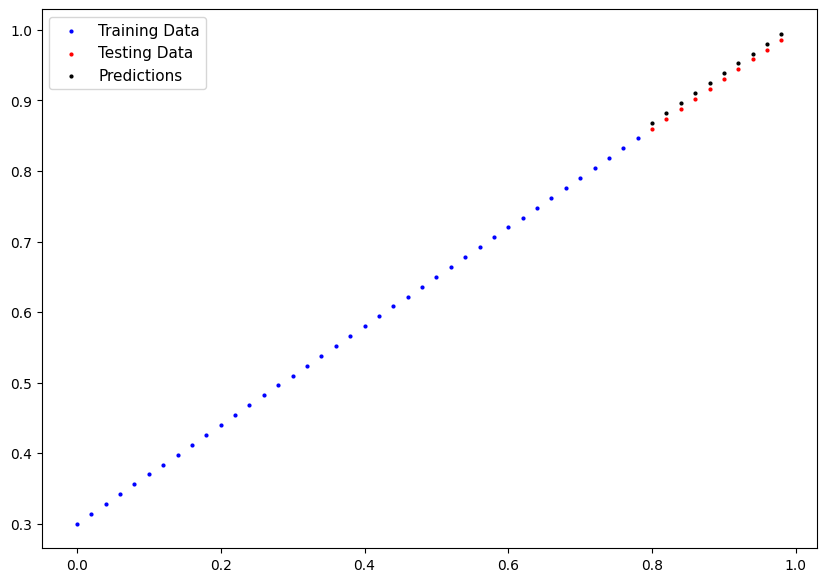

In [19]:
plot_predictions(predictions=y_preds)

In [20]:
model.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [21]:
model = LinearRegressionModel()

In [22]:
list(model.parameters())

[Parameter containing:
 tensor([0.2345], requires_grad=True),
 Parameter containing:
 tensor([0.2303], requires_grad=True)]

In [23]:
with torch.inference_mode():
    preds_2 = model(X_test)

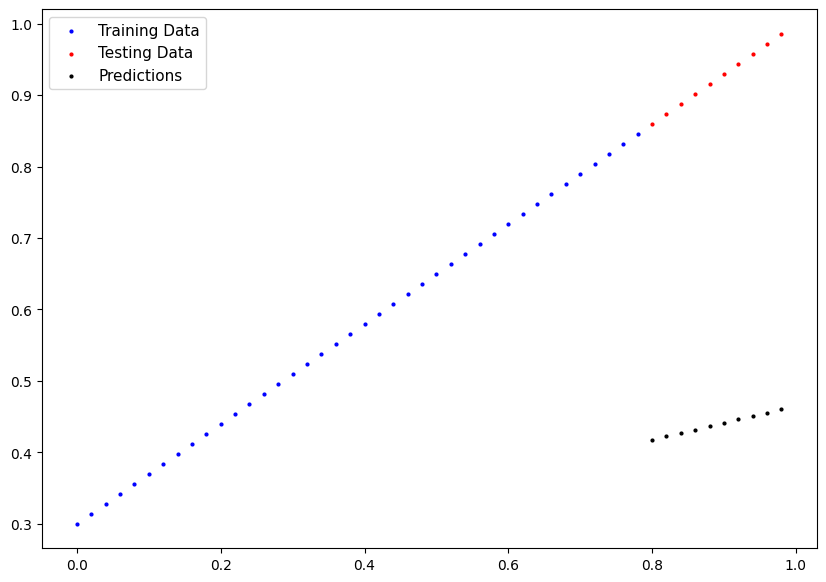

In [24]:
plot_predictions(predictions=preds_2)

In [25]:
abs(y_test - preds_2)

tensor([[0.4421],
        [0.4514],
        [0.4607],
        [0.4700],
        [0.4793],
        [0.4887],
        [0.4980],
        [0.5073],
        [0.5166],
        [0.5259]])

In [26]:
y_test - preds_2

tensor([[0.4421],
        [0.4514],
        [0.4607],
        [0.4700],
        [0.4793],
        [0.4887],
        [0.4980],
        [0.5073],
        [0.5166],
        [0.5259]])

In [27]:
# Writing the loss and optimiser functions

loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(
    params=model.parameters(),
    lr=0.0001
)

# Writing the training loop for practice

0) Set the model in training mode
1) Predict for the data with current parameters, perform a forward pass using the ``forward()`` method.
2) Calculate the loss for the data
3) Set optimizer's data accumulated to 0 using ``optimizer.zero_grad()``
4) Backpropagate the loss using `loss.backward()`
5) Step the optimizer i.e., set the optimizer to update the parameters of the model using ``optimizer.step()``

In [28]:
epochs = 30000 

test_loss_array = []
train_loss_array = []

for epoch in range(epochs):

    # TRAINING LOOP
    # Set in training mode
    model.train()

    # Make predictions
    y_preds = model(X_train)

    # Calculate the loss
    loss = loss_fn(y_preds,y_train)
    train_loss_array.append(loss)

    # Set the optimizer's gradients to 0
    optimizer.zero_grad()

    # Backpropagate the loss
    loss.backward()

    # Perform GD with the optimizer
    optimizer.step()

    # TESTING LOOP
    with torch.inference_mode():
        test_preds = model(X_test)
        test_loss = loss_fn(test_preds,y_test)
        test_loss_array.append(test_loss)

    if epoch%1000 == 0:
        print(f"Epoch: {epoch} || Training Loss: {loss} || Testing Loss: {test_loss}")

Epoch: 0 || Training Loss: 0.25122663378715515 || Testing Loss: 0.4838607907295227


Epoch: 1000 || Training Loss: 0.14213839173316956 || Testing Loss: 0.3524583578109741
Epoch: 2000 || Training Loss: 0.09166976064443588 || Testing Loss: 0.260356068611145
Epoch: 3000 || Training Loss: 0.07439471781253815 || Testing Loss: 0.20573052763938904
Epoch: 4000 || Training Loss: 0.06765337288379669 || Testing Loss: 0.1747949868440628
Epoch: 5000 || Training Loss: 0.06344598531723022 || Testing Loss: 0.15566988289356232
Epoch: 6000 || Training Loss: 0.059939898550510406 || Testing Loss: 0.14445261657238007
Epoch: 7000 || Training Loss: 0.05644945055246353 || Testing Loss: 0.1334388703107834
Epoch: 8000 || Training Loss: 0.052985675632953644 || Testing Loss: 0.12388703972101212
Epoch: 9000 || Training Loss: 0.049549590796232224 || Testing Loss: 0.11585547029972076
Epoch: 10000 || Training Loss: 0.04611348360776901 || Testing Loss: 0.10782048851251602
Epoch: 11000 || Training Loss: 0.04267736151814461 || Testing Loss: 0.0997854694724083
Epoch: 12000 || Training Loss: 0.03924123197

In [29]:
final_preds = model(X_test)

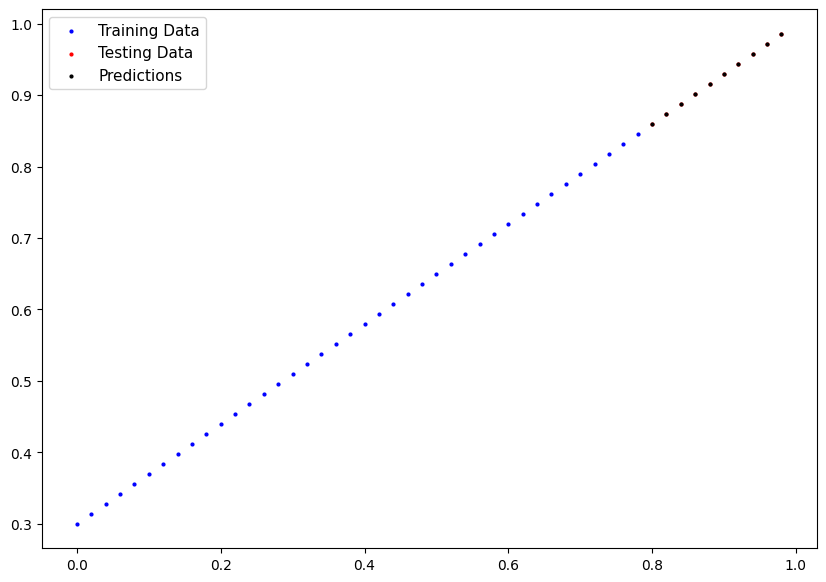

In [30]:
plot_predictions(predictions=final_preds)

In [31]:
final_loss = loss_fn(final_preds,y_test)

In [32]:
final_loss

tensor(6.3592e-05, grad_fn=<MeanBackward0>)

In [33]:
import numpy as np

In [34]:
train_loss_array = np.array(torch.Tensor(train_loss_array).detach())

In [35]:
test_loss_array = np.array(torch.Tensor(test_loss_array).detach())

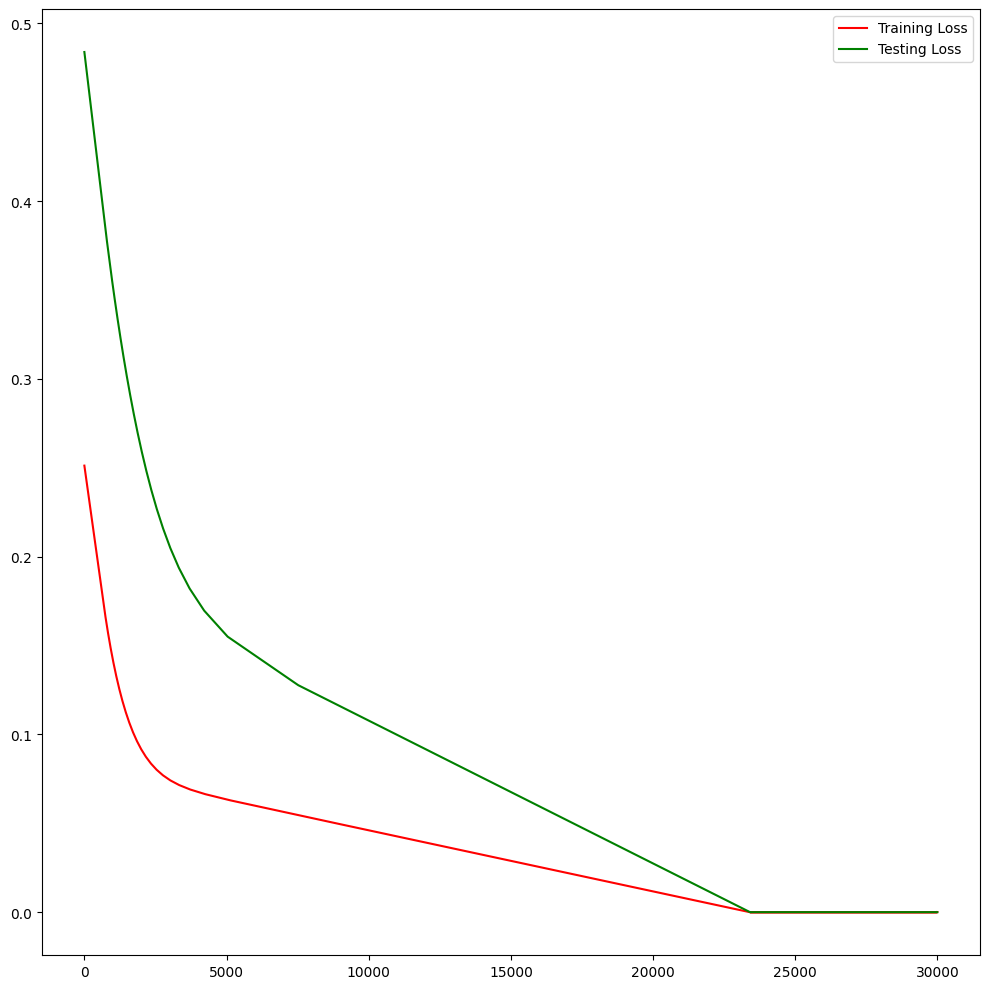

In [36]:
plt.figure(figsize=(10,10))

plt.plot(train_loss_array,c="red", label="Training Loss")
plt.plot(test_loss_array,c="green",label="Testing Loss")

plt.legend()
plt.tight_layout()

In [37]:
torch.save(model,"LinearRegressionModel.pt")

In [38]:
loaded_model = torch.load("LinearRegressionModel.pt")

In [39]:
loaded_model.state_dict()

OrderedDict([('weights', tensor([0.6999])), ('bias', tensor([0.3000]))])

In [40]:
with torch.inference_mode():
    loaded_preds = loaded_model(X_test)

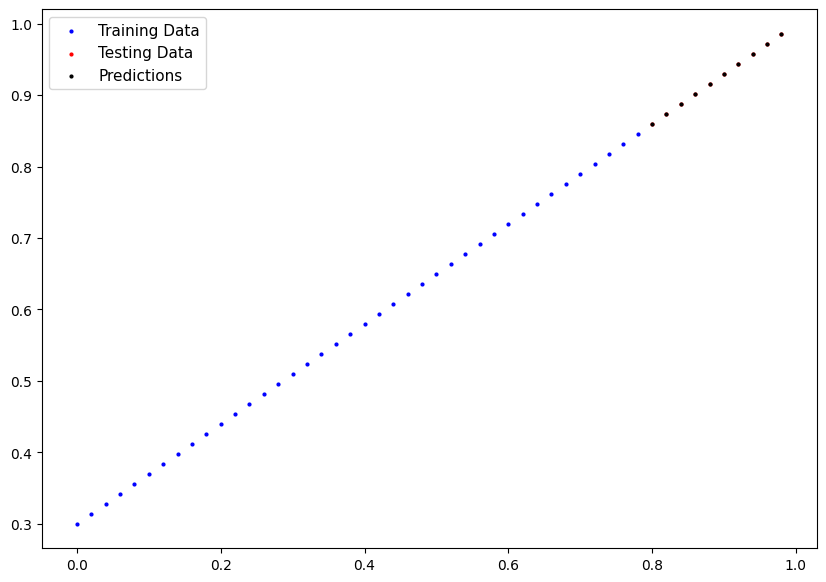

In [41]:
plot_predictions(predictions=loaded_preds)

In [48]:
class LinearRegressionModel(nn.Module):
    """
    Our own custom linear regression model for the linear regression problem.
    """

    def __init__(self, optimizer:torch.optim=None, loss_metric=nn.L1Loss) -> None:

        """
        Initialize the linear regression model.

        Args:
            optimizer (torch.optim, optional): The optimizer to use for training. If not provided,
                the default is SGD with a learning rate of 0.001.
            loss_metric (callable, optional): The loss function to use for training. Default is
                the mean absolute error (L1Loss).
        """

        super().__init__()
        self.weights = nn.Parameter(
            torch.randn(1,dtype=torch.float64,requires_grad=True)
        )
        self.bias = nn.Parameter(
            torch.randn(1,dtype=torch.float64,requires_grad=True)
        )
        if optimizer is None:
            self.optimizer = torch.optim.SGD(self.parameters(), lr=0.001)
        self.loss_fn = loss_metric()

    
    def forward(self, x:torch.tensor)->torch.tensor:
        """
        Perform a forward pass through the linear regression model.

        Args:
            x (torch.tensor): The input features.

        Returns:
            torch.tensor: The predicted output values.
        """
        return (self.weights*x) + self.bias
    
    
    def fit(
            self, 
            X:torch.tensor, 
            y:torch.tensor, 
            epochs:int, 
            validate:bool = False, x_val:torch.tensor = None, y_val:torch.tensor = None
            ):
        
        """
        Train the linear regression model on the given data.

        Args:
            X (torch.tensor): The input features for training.
            y (torch.tensor): The target values for training.
            epochs (int): The number of epochs to train for.
            validate (bool, optional): Whether to compute validation loss during training. Default is False.
            x_val (torch.tensor, optional): The input features for validation. Required if validate is True.
            y_val (torch.tensor, optional): The target values for validation. Required if validate is True.

        Returns:
            tuple: A tuple containing two lists:
                - train_loss_array: A list of training losses for each epoch.
                - test_loss_array: A list of validation losses for each epoch (if validate is True).
        """
        

        train_loss_array = []
        test_loss_array = []
        for epoch in range(epochs):

            # Set the model in training mode
            self.train()

            # Make a forward pass and predict off the labels
            train_preds = self.forward(X)

            # Calculate the loss
            loss = self.loss_fn(train_preds, y)

            # Zero grad the optimizer
            self.optimizer.zero_grad()

            # Backpropagate the loss
            loss.backward()

            # Step the optimizer
            self.optimizer.step()

            if validate:
                self.eval()
                with torch.inference_mode():
                    test_preds = self.forward(x_val)
                    test_loss = self.loss_fn(test_preds, y_val)
                    test_loss_array.append(test_loss)
                    train_loss_array.append(loss)
                print(f"Epoch: {epoch+1} \t|| Train Loss: {loss} \t|| Test Loss: {test_loss}")
            else:
                train_loss_array.append(loss)
                print(f"Epoch: {epoch+1} \t|| Train Loss: {loss}")
        if validate:
            return train_loss_array, test_loss_array
        else:
            return train_loss_array
        


    def plot_metrics(self, train_loss_array, test_loss_array=None):
        """
        Plot the loss curve for the training and validation data.

        Args:
            train_loss_array (list): A list of training losses for each epoch.
            test_loss_array (list, optional): A list of validation losses for each epoch. 
        """
        # Detach the tensors and convert them to lists
        train_loss_array = [loss.detach().numpy() for loss in train_loss_array]
        if test_loss_array is not None:
            test_loss_array = [loss.detach().numpy() for loss in test_loss_array]

        plt.figure(figsize=(10, 5))
        plt.plot(train_loss_array, label='Training Loss')
        if test_loss_array is not None:
            plt.plot(test_loss_array, label='Validation Loss')
        plt.title('Loss Metrics')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()


In [58]:
torch.manual_seed(1000)
model = LinearRegressionModel()
list(model.parameters())

[Parameter containing:
 tensor([-1.1720], dtype=torch.float64, requires_grad=True),
 Parameter containing:
 tensor([-0.3929], dtype=torch.float64, requires_grad=True)]

In [59]:
train_loss,test_loss = model.fit(X=X_train,y=y_train,epochs=15000,validate=True,x_val=X_test,y_val=y_test)

Epoch: 1 	|| Train Loss: 1.422983400224267 	|| Test Loss: 2.357660907309107
Epoch: 2 	|| Train Loss: 1.4218313002306304 	|| Test Loss: 2.3563138073126493
Epoch: 3 	|| Train Loss: 1.4206792002369941 	|| Test Loss: 2.354966707316191
Epoch: 4 	|| Train Loss: 1.4195271002433576 	|| Test Loss: 2.3536196073197324
Epoch: 5 	|| Train Loss: 1.4183750002497213 	|| Test Loss: 2.3522725073232738
Epoch: 6 	|| Train Loss: 1.4172229002560848 	|| Test Loss: 2.350925407326816
Epoch: 7 	|| Train Loss: 1.4160708002624482 	|| Test Loss: 2.3495783073303578
Epoch: 8 	|| Train Loss: 1.414918700268812 	|| Test Loss: 2.348231207333899
Epoch: 9 	|| Train Loss: 1.4137666002751756 	|| Test Loss: 2.3468841073374413
Epoch: 10 	|| Train Loss: 1.4126145002815391 	|| Test Loss: 2.3455370073409827
Epoch: 11 	|| Train Loss: 1.4114624002879026 	|| Test Loss: 2.344189907344524
Epoch: 12 	|| Train Loss: 1.4103103002942663 	|| Test Loss: 2.342842807348066
Epoch: 13 	|| Train Loss: 1.4091582003006298 	|| Test Loss: 2.3414957

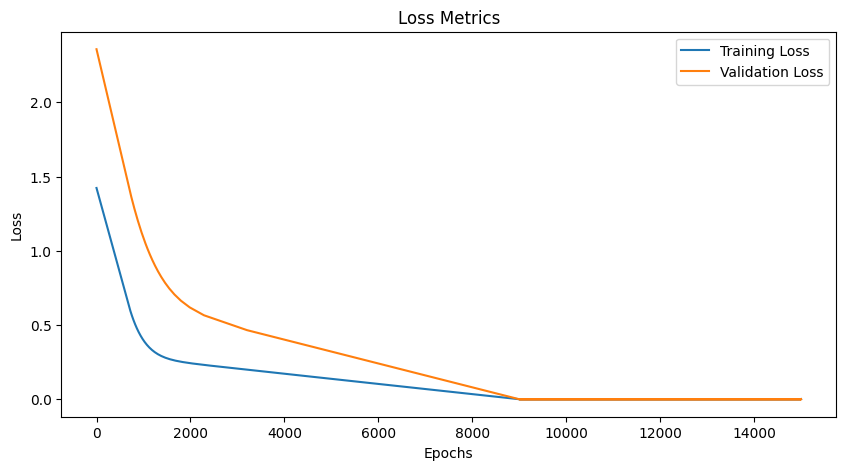

In [60]:
model.plot_metrics(train_loss_array=train_loss,test_loss_array=test_loss)